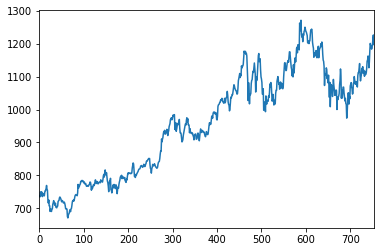

In [2]:
from pandas import Series
import pandas as pd
import numpy as np
from matplotlib import pyplot
df = pd.read_csv('GoogleStocks.csv')
final_prediction = np.array(df.iloc[:,3].values).tolist()
del final_prediction[0]
a = []
for i in final_prediction:
    a.append(float(i))
a.reverse()
series = Series(a)
series.plot()
pyplot.show()

In [2]:
from keras.models import Sequential
from keras.layers import Dropout
import pandas as pd
from keras.layers import LSTM
import numpy as np
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import copy
# Using TensorFlow backend.

Using TensorFlow backend.


In [3]:
df = pd.read_csv('GoogleStocks.csv')
df = df.drop(df.index[0])
avg = []
for index,row in df.iterrows():
    temp = float(row['low']) + float(row['high'])
    temp = temp/2
    avg.append(temp)

df['avg'] = avg
df = df[['open','avg','volume']]
final_prediction = np.array(df.iloc[0:690,0].values).tolist()

In [4]:
def predict(time_steps,regressor,sc):
    
    X_test = []
    for i in range(0, 55):
        X_test.append(training_set_scaled_1[i-time_steps+690:i+690, :])
    X_test = np.array(X_test)
    yy = X_test.shape[1]
    xx = X_test.shape[0]
    X_test = np.reshape(X_test, (xx, yy, 2))
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    for x in predicted_stock_price:
        final_prediction.append(x)

In [5]:
df.isna().any()
B = np.reshape(df.iloc[:,0].values, (-1, 1))
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(B)
sc1 = MinMaxScaler(feature_range = (0,1))
training_set_scaled_1 = sc1.fit_transform(df.iloc[:,1:3])
training_set_scaled_c = copy.deepcopy(training_set_scaled)
training_set_scaled_1_c = copy.deepcopy(training_set_scaled_1)

/home/vatsal/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vatsal/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
y_train = []
X_train = []
st = 75
for i in range(st, 690):
    X_train.append(training_set_scaled_1[i-st:i, :])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
x_dimension = X_train.shape[0]
y_dimension = X_train.shape[1]
X_train = np.reshape(X_train, (x_dimension, y_dimension, 2))
y_dimension = X_train.shape[1]

regressor = Sequential()

regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (y_dimension, 2)))
flag = 1
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 50, return_sequences = True))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, batch_size = 30, epochs = 20)
predict(st,regressor,sc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
615/615 [==============================] - 8s 14ms/step - loss: 0.0719
Epoch 2/20
615/615 [==============================] - 4s 7ms/step - loss: 0.0161
Epoch 3/20
615/615 [==============================] - 5s 8ms/step - loss: 0.0110
Epoch 4/20
615/615 [==============================] - 5s 8ms/step - loss: 0.0111
Epoch 5/20
615/615 [==============================] - 5s 9ms/step - loss: 0.0117
Epoch 6/20
615/615 [==============================] - 6s 9ms/step - loss: 0.0107
Epoch 7/20
615/615 [==============================] - 4s 7ms/step - loss: 0.0099
Epoch 8/20
615/615 [==============================] - 4s 7ms/step - loss: 0.0095
Epoch 9/20
615/615 [==============================] - 4s 7ms/step - loss: 0.0097
Epoch 10/20
615/615 [==============

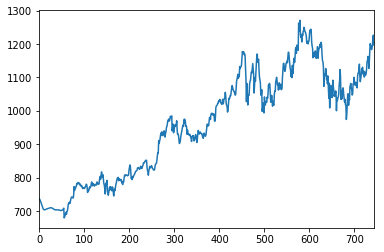

In [7]:
a = []
for i in final_prediction:
    a.append(float(i))
a.reverse()
series = Series(a)
series.plot()
pyplot.show()

In [8]:
from hmmlearn.hmm import GaussianHMM

In [9]:
df = pd.read_csv('GoogleStocks.csv')
df = df.drop(df.index[0])
# print(df)
avg = []
for index,row in df.iterrows():
#     print(row)
    temp = float(row['low']) + float(row['high'])
#     print(temp)
    temp = temp/2
    avg.append(temp)

df['avg'] = avg
df = df[['open','avg','volume']]
final_prediction = np.array(df.iloc[0:690,0].values).tolist()

In [10]:
df.isna().any()
# df
w1 = []
for i in df.iloc[:,0].values:
    w2 = []
    w2.append(i)
    w1.append(w2)

In [11]:
sc1 = MinMaxScaler(feature_range = (0,1))
training_set_scaled_1 = sc1.fit_transform(df.iloc[:,0:3])

/home/vatsal/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
hmm = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000)
model = hmm.fit(training_set_scaled_1)
 
k = 50
for q in range(690,754):

    x_train = copy.deepcopy(training_set_scaled_1[q-k:q,:])
    final_score = -100000000000
    final_predicted = 0
    p = 0
    while p <= 1:
        temp = copy.deepcopy(training_set_scaled_1[q+1,:])
        temp[0] = p
        x_train = np.vstack((x_train, temp))

        sc = model.score(x_train)

        if sc > final_score:
            final_score = sc
            B = np.reshape(temp, (-1, 1))
            tempX = sc1.inverse_transform(B.T)
            final_predicted = tempX[0][0]
        x_train = x_train[0:x_train.shape[0]-1,:]
        p = p + 0.02
    final_prediction.append(final_predicted)

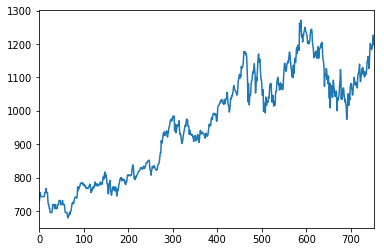

In [13]:
a = []
for i in final_prediction:
    a.append(float(i))
a.reverse()
series = Series(a)
series.plot()
pyplot.show()